### Occurrence Rates

Estimate planet occurrence rates using the inverse detection efficiency method. 

This example calculates the occurrence rates for different classes of planets, defined by a size and period-range

In [1]:
import EPOS
import numpy as np
import matplotlib.pyplot as plt

initialize the EPOS class with the kepler dr25 exoplanet survey

In [2]:
epos= EPOS.epos(name='occurrence_rate_inverse', survey='Kepler')


 |~| epos 3.0.2 |~|

Initializing 'occurrence_rate_inverse'

Using random seed 1678722249

Survey: Kepler-Gaia all dwarfs, reliability > 0.9


Calculate the survey completeness for each planet


Interpolating planet occurrence


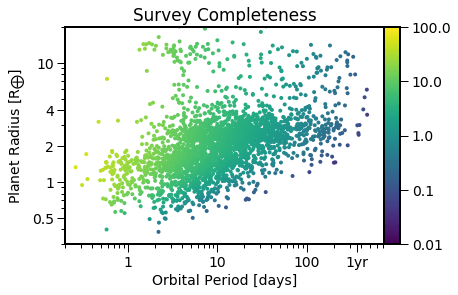

In [3]:
EPOS.occurrence.planets(epos)
EPOS.plot.occurrence.colored(epos, NB=True)

Define a set of period (x) and radius (y) bins to calculate occurrence rates for Hot Jupiters, Super Earths, and Mini-Neptunes

In [4]:
# Hot-Jupiters
Period_HJ= [1,10] # days
Radius_HJ= [8,16] # earth radii 
# super-earths
Period_SE= [0.5,50] # days
Radius_SE= [0.7,1.8] # earth radii 
# mini-Neptunes
Period_MN= [2,300] # days
Radius_MN= [2.0,4.0] # earth radii 

epos.set_bins(xbins=[Period_HJ,Period_MN, Period_SE], 
              ybins=[Radius_HJ, Radius_MN, Radius_SE])

Calculate the occurrence rates and visualize them


  Observed Planets
  x: [1,10], y: [8,16], n=55, comp=0.12, occ=0.0043
  x: [2,300], y: [2,4], n=1093, comp=0.039, occ=0.52
  x: [0.5,50], y: [0.7,1.8], n=1018, comp=0.072, occ=0.31


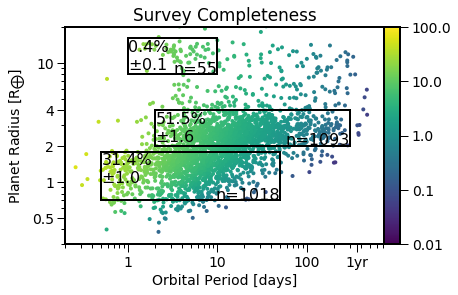

In [5]:
EPOS.occurrence.binned(epos)
EPOS.plot.occurrence.colored(epos, Bins=True, NB=True)

Looks like there are many more super-earths and mini-Neptunes than Hot Juiters!

Now let's calculate occurrence rates on the SAG13 grid

In [6]:
epos.set_bins(xgrid=np.geomspace(10,640,7), 
   	ygrid=np.geomspace(0.67,17,9), Grid=True)
EPOS.occurrence.all(epos)


Interpolating planet occurrence

  Observed Planets
  x: [10,20], y: [0.67,1], n=16, comp=0.0072, occ=0.022
  x: [20,40], y: [0.67,1], n=10, comp=0.0023, occ=0.046
  x: [40,80], y: [0.67,1], n=0, comp=nan, occ=0
  x: [80,160], y: [0.67,1], n=0, comp=nan, occ=0
  x: [160,320], y: [0.67,1], n=0, comp=nan, occ=0
  x: [320,640], y: [0.67,1], n=0, comp=nan, occ=0
  x: [10,20], y: [1,1.5], n=99, comp=0.021, occ=0.043
  x: [20,40], y: [1,1.5], n=30, comp=0.011, occ=0.026
  x: [40,80], y: [1,1.5], n=9, comp=0.005, occ=0.019
  x: [80,160], y: [1,1.5], n=3, comp=0.001, occ=0.025
  x: [160,320], y: [1,1.5], n=2, comp=0.00047, occ=0.035
  x: [320,640], y: [1,1.5], n=0, comp=nan, occ=0
  x: [10,20], y: [1.5,2.3], n=181, comp=0.033, occ=0.047
  x: [20,40], y: [1.5,2.3], n=82, comp=0.018, occ=0.038
  x: [40,80], y: [1.5,2.3], n=40, comp=0.01, occ=0.036
  x: [80,160], y: [1.5,2.3], n=21, comp=0.0036, occ=0.055
  x: [160,320], y: [1.5,2.3], n=6, comp=0.0013, occ=0.042
  x: [320,640], y: [1.5,2.3], n=0

/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mulders/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


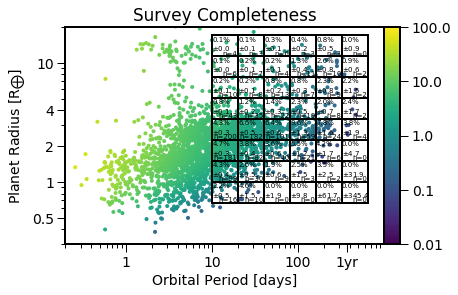

In [7]:
epos.plotpars['textsize']= 7
epos.xtrim[1]= 1000
EPOS.plot.occurrence.colored(epos, Bins=True, NB=True)

Save the binned rates to a file:
json/occurrence_rate_inverse/occurrence.inverse.json

In [8]:
EPOS.save.occurrence(epos)